In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

In [2]:
############ STATS FUNCTIONS #############

def clusters_stats(predict, y):
    stats = np.zeros((10,3))
    for i in range(10):
        indices = np.where(predict == i)
        cluster = y[indices]
        stats[i,:] = clust_stats(cluster)
    return stats

def clust_stats(cluster):
    class_freq = np.zeros(10)
    for i in range(10):
        class_freq[i] = np.count_nonzero(cluster == i)
    most_freq = np.argmax(class_freq)
    n_majority = np.max(class_freq)
    n_all = np.sum(class_freq)
    return (n_majority, n_all, most_freq)

def clusters_purity(clusters_stats):
    majority_sum  = clusters_stats[:,0].sum()
    n = clusters_stats[:,1].sum()
    return majority_sum / n

############ PLOT FUNCTIONS ##############

def plot_d(digit, label):
    plt.axis('off')
    plt.imshow(digit.reshape((28,28)), interpolation = "bicubic", cmap = "afmhot")
    plt.title(label)

def plot_ds(digits, title, labels):
    n=digits.shape[0]
    n_rows=n/20+1
    n_cols=20
    plt.figure(figsize=(n_cols * 0.9, n_rows * 1.3))
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle(title)
    for i in range(n):
        plt.subplot(n_rows, n_cols, i + 1)
        plot_d(digits[i,:], "%d" % labels[i])
        
def plot_clusters(predict, y, stats):
    for i in range(10):
        indices = np.where(predict == i)
        title = "Most freq item %d, cluster size %d, majority %d " % (stats[i,2], stats[i,1], stats[i,0])
        plot_ds(X[indices][:20], title, y[indices])

In [3]:
train = pd.read_csv("/home/hab/Desktop/machine_learning/datasets/mnist/mnist_train.csv")
test = pd.read_csv("/home/hab/Desktop/machine_learning/datasets/mnist/mnist_test.csv")
mnist = pd.concat([train, test])
X = mnist.drop('label', axis=1)
y = mnist.label

KeyError: 0

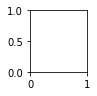

In [4]:
plt.figure(figsize=(12,12))
for i in range(0,40):
    plt.subplot(9,10,i+1)
    grid_data = X[i].reshape(28,28)
    plt.imshow(grid_data, interpolation = "bicubic", cmap = "afmhot")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [ ]:
pca = PCA(n_components=10)
pca.fit_transform(X)
kmeans = KMeans(n_clusters=10, n_init=5)
labels = kmeans.fit_predict(X)

In [ ]:
stats = clusters_stats(labels, y)
purity = clusters_purity(stats)
print("Purity: %f" % purity)
plot_clusters(labels, y, stats)

In [ ]:
kmeans.inertia_

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(X, labels)